__Задача 1__

Используя данные о хоккеистах (скачать можно здесь), проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие: а) роста, б) BMI.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [4]:
hockey_df = pd.read_csv('./hockey_players.csv')
hockey_df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [5]:
hockey_df.country.unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

In [6]:
countries = ['FIN', 'NOR', 'DEN']
hockey_df[hockey_df.country.isin(countries)].size

13338

In [7]:
def anova(*ys: np.ndarray) -> float:
    """Функция возвращает значение F-статистики
    для дисперсионного анализа.
    """
    
    y = np.concatenate(ys)

    ss_b = sum((yi.mean() - y.mean()) ** 2 * yi.size for yi in ys)
    ss_w = sum(((yi - yi.mean()) ** 2).sum() for yi in ys)
    
    sigma_b = ss_b / (len(ys) - 1)
    sigma_w = ss_w / (y.size - len(ys))
    
    return sigma_b / sigma_w


In [8]:
ys = [hockey_df.loc[hockey_df['country'] == country, 'height'] for country in countries]

F = anova(*ys)
F

4.273207343917213

In [9]:
k = len(countries)
n = sum(y.size for y in ys)

k1 = k - 1
k2 = n - k

k1, k2

(2, 1023)

In [10]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0045220661840073

Критическая область (3.0045220, oo)

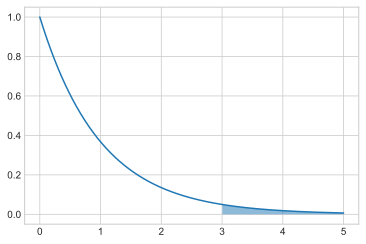

In [11]:
ox = np.linspace(0, 5, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 5, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)


Значение статистики 4.273207343 попадает в критическую область ->> между ростом хоккеистов из выбранных стран есть значимые отличия.

___Посчитаем для BMI___

In [12]:
ys = [hockey_df.loc[hockey_df['country'] == country, 'bmi'] for country in countries]

F = anova(*ys)
F

36.05816727743814

Значение статистики для значений BMI также попадает в критическую область ->> среди этих значений есть значимые отличия.